## 데이터 살펴보기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 데이터 살펴보기
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#TotalCharges 컬럼 전처리
# 문자열 --> 숫자형
# 빈 값인 경우 NaN으로 변경
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [12]:
# 결측치 확인
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# 결측치 제거
df.dropna(inplace=True)

In [15]:
# 고객 ID 컬럼 제거
df.drop(['customerID'],axis=1,inplace=True)

In [16]:
# Churn 컬럼을 숫자로 바꾸기
df.replace({'Churn': {'Yes': 1, 'No': 0}}, inplace=True)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [18]:
# 카테고리형 데이터 바꾸기
df_dummies = pd.get_dummies(df)
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


<AxesSubplot:>

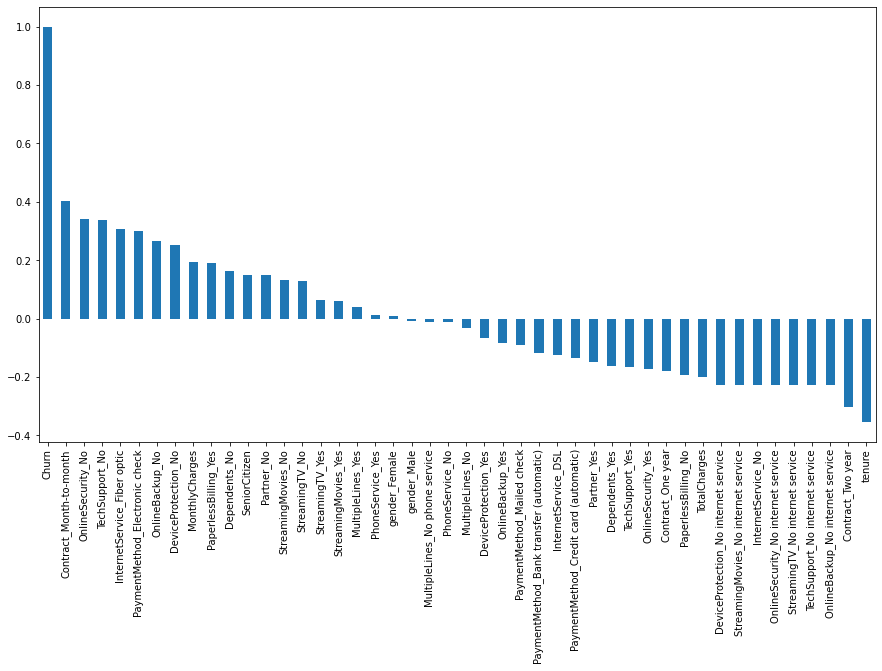

In [20]:
# 각 변수 별 이탈과 관계 보기
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [25]:
# churn 비율 살펴보기
df['Churn'].value_counts(normalize=True).rename('proportion').reset_index().rename(columns={'index':'churn'})

,churn,proportion
0,0,0.734215
1,1,0.265785


<AxesSubplot:xlabel='Churn', ylabel='proportion'>

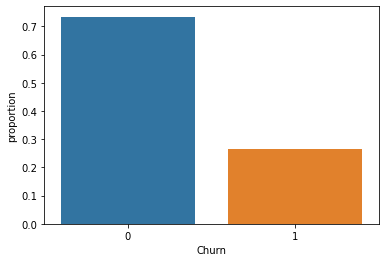

In [26]:
sns.barplot(x='Churn', y='proportion', data=df['Churn'].value_counts(normalize=True).rename('proportion').reset_index().rename(columns={'index': 'Churn'}))

<AxesSubplot:xlabel='tenure', ylabel='Count'>

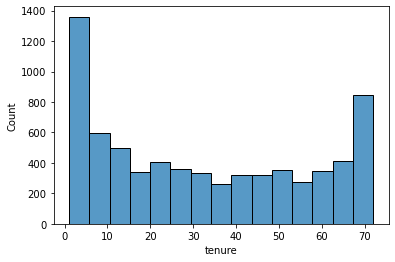

In [27]:
# 고객 유지 기간 살펴보기
sns.histplot(x='tenure', data=df)

In [31]:
# 계약 종류별 이탈룰 살펴보기
df.groupby('Contract')['Churn'].value_counts(normalize=True).rename('proportion').reset_index()

,Contract,Churn,proportion
0,Month-to-month,0,0.572903
1,Month-to-month,1,0.427097
2,One year,0,0.887228
3,One year,1,0.112772
4,Two year,0,0.971513
5,Two year,1,0.028487


<AxesSubplot:xlabel='Contract', ylabel='proportion'>

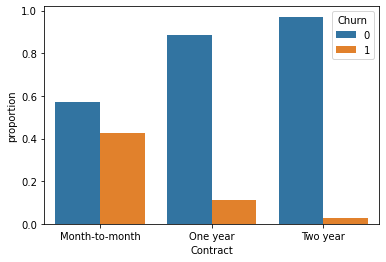

In [32]:
sns.barplot(x='Contract', y='proportion', hue='Churn', data=df.groupby('Contract')['Churn'].value_counts(normalize=True).rename('proportion').reset_index())

In [33]:
# 학습/테스트 데이터셋 나누기
train_df, test_df = train_test_split(df_dummies, random_state=0)
train_X = train_df.drop(columns='Churn')
train_y = train_df['Churn'].values
test_X = test_df.drop(columns='Churn')
test_y = test_df['Churn'].values

## 트리 모델로 이탈 예측하기

In [34]:
# 라이브러리 불러오기
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [35]:
# 모델 초기화 및 학습하기
model = DecisionTreeClassifier(random_state=0, max_depth=5, )
model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [36]:
# 모델 평가하기 (정확도)
from sklearn import metrics
prediction_test = model.predict(test_X)
print(metrics.accuracy_score(test_y, prediction_test))

0.7969283276450512


[Text(697.5, 951.3000000000001, 'Contract_Month-to-month <= 0.5\ngini = 0.394\nsamples = 5274\nvalue = [3852, 1422]\nclass = Not Churn'),
 Text(348.75, 679.5, 'MonthlyCharges <= 93.675\ngini = 0.127\nsamples = 2342\nvalue = [2183, 159]\nclass = Not Churn'),
 Text(174.375, 407.70000000000005, 'OnlineSecurity_No <= 0.5\ngini = 0.074\nsamples = 1766\nvalue = [1698, 68]\nclass = Not Churn'),
 Text(87.1875, 135.89999999999998, '\n  (...)  \n'),
 Text(261.5625, 135.89999999999998, '\n  (...)  \n'),
 Text(523.125, 407.70000000000005, 'tenure <= 70.5\ngini = 0.266\nsamples = 576\nvalue = [485, 91]\nclass = Not Churn'),
 Text(435.9375, 135.89999999999998, '\n  (...)  \n'),
 Text(610.3125, 135.89999999999998, '\n  (...)  \n'),
 Text(1046.25, 679.5, 'InternetService_Fiber optic <= 0.5\ngini = 0.49\nsamples = 2932\nvalue = [1669, 1263]\nclass = Not Churn'),
 Text(871.875, 407.70000000000005, 'tenure <= 5.5\ngini = 0.411\nsamples = 1324\nvalue = [942, 382]\nclass = Not Churn'),
 Text(784.6875, 135.

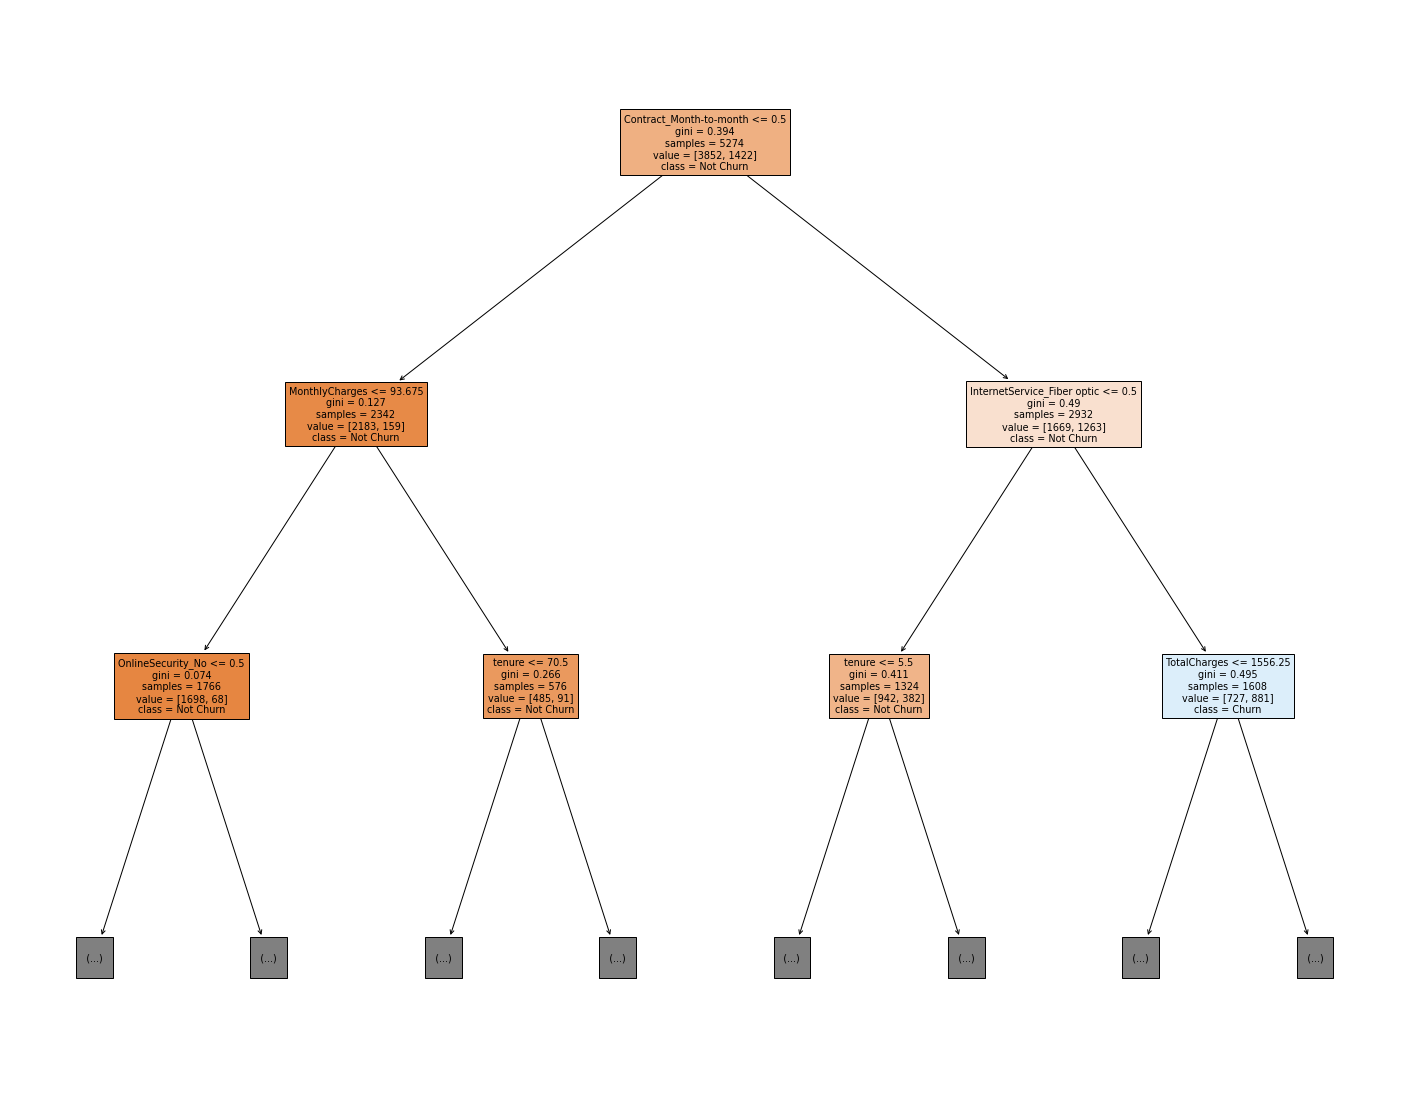

In [37]:
# 의사 결정 나무 시각화하기
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model, 
                   feature_names=train_X.columns,  
                   class_names=['Not Churn', 'Churn'],
                   max_depth=2,
                   filled=True)